In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['TSLA', 'META'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                  Close                   High  \
Symbols          TSLA        META       TSLA        META       TSLA   
Date                                                                  
2018-01-02  21.368668  181.419998  21.368668  181.419998  21.474001   
2018-01-03  21.150000  184.669998  21.150000  184.669998  21.683332   
2018-01-04  20.974667  184.330002  20.974667  184.330002  21.236668   
2018-01-05  21.105333  186.850006  21.105333  186.850006  21.149332   
2018-01-08  22.427334  188.279999  22.427334  188.279999  22.468000   

Attributes                    Low                   Open              \
Symbols           META       TSLA        META       TSLA        META   
Date                                                                   
2018-01-02  181.580002  20.733334  177.550003  20.799999  177.679993   
2018-01-03  184.779999  21.036667  181.330002  21.400000  181.880005   
2018-01-04  186.210007  20.378668  184.100006  20.858000  184.899994   
2018-01-05  186.899994  20.799999  184.929993  21.108000  185.589996   
2018-01-08  188.899994  21.033333  186.330002  21.066668  187.199997   

Attributes     Volume            
Symbols          TSLA      META  
Date                             
2018-01-02   65283000  18151900  
2018-01-03   67822500  16886600  
2018-01-04  149194500  13880900  
2018-01-05   68868000  13574500  
2018-01-08  147891000  17994700

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,META
Date,,
2018-01-02,21.368668,181.419998
2018-01-03,21.150000,184.669998
2018-01-04,20.974667,184.330002
2018-01-05,21.105333,186.850006
2018-01-08,22.427334,188.279999


In [4]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

In [5]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483733956322896

In [6]:
# Log of Percentage change for Facebook
fb = test['META'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: META, dtype: float64

In [7]:
# Variance
var_fb = fb.var()
var_fb

0.00045697258417022536

In [8]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.53581092645454, 0.33799873674698305)

<AxesSubplot:xlabel='Symbols'>

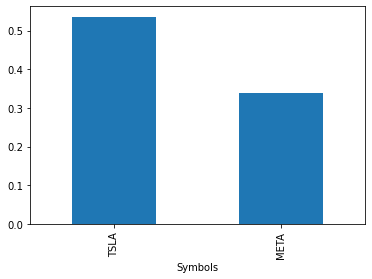

In [9]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [10]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,META
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [12]:
# Covariance
test1['TSLA'].cov(test1['META'])

0.00018261619726860567

In [13]:
test1['TSLA'].corr(test1['META'])

0.25208828334500855

In [14]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,META
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [15]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
META    0.000246
dtype: float64

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.0003027691433275711